# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Get the Data

In [4]:
path = pd.read_csv('advertising.csv')
df = pd.DataFrame(path)
df.head()



,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
df.value_counts()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Ad Topic Line                               City              Male  Country                 Timestamp            Clicked on Ad
32.60                     38   40159.20     190.05                Customizable homogeneous contingency        Tylerport         0     Syrian Arab Republic    2016-02-12 03:39:09  1                1
75.92                     22   38427.66     182.65                Monitored context-sensitive initiative      Port Calvintown   0     Russian Federation      2016-02-26 01:18:44  0                1
75.55                     36   31998.72     123.71                Decentralized attitude-oriented interface   South Davidmouth  1     Bosnia and Herzegovina  2016-03-12 06:05:12  1                1
                               73234.87     159.24                Managed grid-enabled standardization        Ramirezside       0     Liechtenstein           2016-05-09 02:58:58  1                1
75.64          

In [7]:
print(df.groupby('Clicked on Ad').size())

Clicked on Ad
0    500
1    500
dtype: int64


0    500
1    500
Name: Clicked on Ad, dtype: int64

In [76]:
# ojea percentiles


0.0

# 1. Exploratory Data Analysis

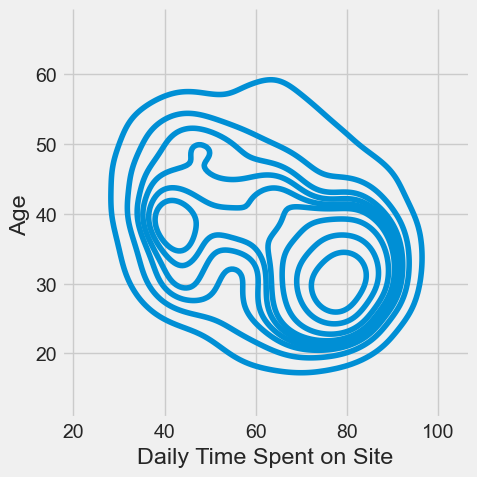

In [18]:
sns.displot(df, x="Daily Time Spent on Site", y="Age",  kind="kde")

In [28]:
#g = sns.JointGrid(data=df, x="Daily Time Spent on Site", y="Age")
#g.plot_joint(sns.displot,  kind="kde");

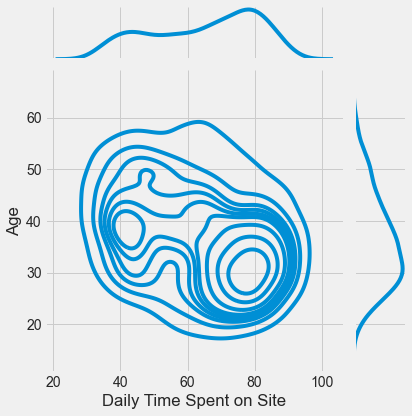

In [77]:
# calcula distribuciones conjuntas


In [32]:
# procesa fechas
time = pd.to_datetime(df['Timestamp'])
time.head()

0   2016-03-27 00:53:11
1   2016-04-04 01:39:02
2   2016-03-13 20:35:42
3   2016-01-10 02:31:19
4   2016-06-03 03:36:18
Name: Timestamp, dtype: datetime64[ns]

In [35]:
time.dt.year

0      2016
1      2016
2      2016
3      2016
4      2016
       ... 
995    2016
996    2016
997    2016
998    2016
999    2016
Name: Timestamp, Length: 1000, dtype: int64

In [36]:

df['Timestamp_day'] = time.dt.day
df['Timestamp_month'] = time.dt.month
df['Timestamp_hour'] = time.dt.hour
df['Timestamp_minutes'] = time.dt.minute
df['Timestamp_weekday'] = time.dt.weekday
df['Timestamp_noche'] = time.dt.is_year_end
#df['Timestamp_diff_days'] = datetime.now() - time.dt.is_year_end


In [37]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Timestamp_day,Timestamp_month,Timestamp_hour,Timestamp_minutes,Timestamp_weekday,Timestamp_noche,Timestamp_diff_days
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,27,3,0,53,6,False,False
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,4,1,39,0,False,False
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,13,3,20,35,6,False,False
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,10,1,2,31,6,False,False
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,6,3,36,4,False,False


0       85
1       93
2       72
3        8
4      154
      ... 
995     41
996    111
997     31
998     82
999    154
Name: Timestamp, Length: 1000, dtype: int64

<AxesSubplot:>

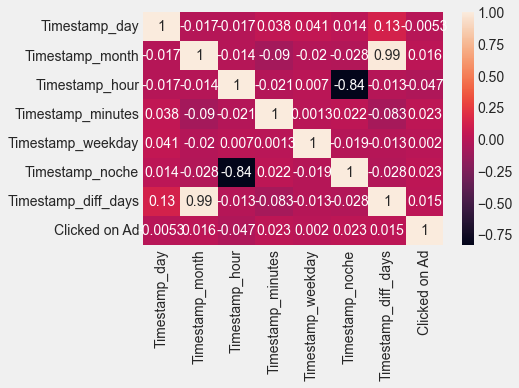

# 2. Prepare Data for Logistic Regression


In [83]:
# ciudades unicas


969

In [84]:
# usa labelencoder para las ciudades


,Ad Topic Line,Ad Topic Line le
0,Cloned 5thgeneration orchestration,91
1,Monitored national standardization,464
2,Organic bottom-line service-desk,566
3,Triple-buffered reciprocal time-frame,903
4,Robust logistical utilization,766
...,...,...
995,Fundamental modular algorithm,345
996,Grass-roots cohesive monitoring,359
997,Expanded intangible solution,263
998,Proactive bandwidth-monitored policy,641


,Timestamp,Timestamp_day,Timestamp_month,Timestamp_hour,Timestamp_minutes,Timestamp_weekday,Timestamp_noche,Timestamp_diff_days
0,2016-03-27 00:53:11,27,3,0,53,6,1,85
1,2016-04-04 01:39:02,4,4,1,39,0,1,93
2,2016-03-13 20:35:42,13,3,20,35,6,0,72
3,2016-01-10 02:31:19,10,1,2,31,6,1,8
4,2016-06-03 03:36:18,3,6,3,36,4,1,154
...,...,...,...,...,...,...,...,...
995,2016-02-11 21:49:00,11,2,21,49,3,0,41
996,2016-04-22 02:07:01,22,4,2,7,4,1,111
997,2016-02-01 17:24:57,1,2,17,24,0,0,31
998,2016-03-24 02:35:54,24,3,2,35,3,1,82


Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Country', 'Timestamp',
       'Clicked on Ad', 'Timestamp_day', 'Timestamp_month', 'Timestamp_hour',
       'Timestamp_minutes', 'Timestamp_weekday', 'Timestamp_noche',
       'Timestamp_diff_days', 'City_le', 'Ad Topic Line le'],
      dtype='object')


#### 1. Train test split


91.43
32.6


91.43
32.6



#### 2. StandardScaler()


array([[7.565000e+01, 3.900000e+01, 6.402155e+04, 2.479000e+02],
       [4.604000e+01, 3.200000e+01, 6.549993e+04, 1.479200e+02],
       [6.942000e+01, 2.500000e+01, 6.579117e+04, 2.133800e+02],
       ...,
       [9.137000e+01, 4.500000e+01, 5.192049e+04, 1.826500e+02],
       [5.666000e+01, 4.200000e+01, 7.268444e+04, 1.394200e+02],
       [8.991000e+01, 4.000000e+01, 5.959356e+04, 1.942300e+02]])

# 3. Implement Logistic Regression in Scikit-Learn and predict

0.9633333333333334
0.9798657718120806
0.948051948051948
0.9636963696369636
0.9637520014232343


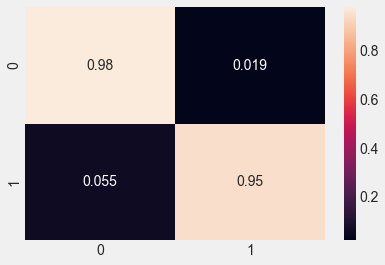

[0.95714286 1.         0.98571429 0.98571429 0.95714286 0.92857143
 0.97142857 0.95714286 0.98571429 0.97142857]
Logistic Regression: 0.970000 (0.019640)


# 4. Evaluate models



#### 1. Confusion Matrix


array([[143,   3],
       [  8, 146]], dtype=int64)

0.8966666666666666

array([146, 154], dtype=int64)

array([[0.97945205, 0.01948052],
       [0.05479452, 0.94805195]])

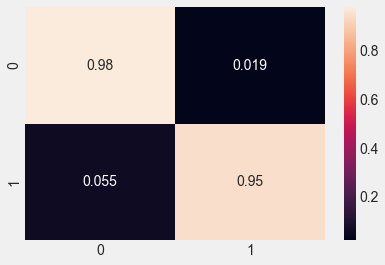

In [102]:
# De todas las clasificaciones del predictor, cuántas son correctas

0.9633333333333334


#### 2. Precision


0.9798657718120806

In [104]:
#TP/TP+FP De todos los 1s que he clasificado con mi predictor, cuántos son correctos

array([[143,   3],
       [  8, 146]], dtype=int64)

0.9555555555555556



#### 3. Recall


0.948051948051948

In [107]:
#TP/TP+FN De todos los 1s reales, cuántos he clasificado correctamente

array([[143,   3],
       [  8, 146]], dtype=int64)

0.948051948051948



#### 4. F1 Score


0.9636963696369636

array([[143,   3],
       [  8, 146]], dtype=int64)

0.9636963696369636



#### 5. ROC curve

0.9637520014232343

# 5. Conclusions

In [113]:
# validación cruzada


[0.95714286 1.         0.98571429 0.98571429 0.95714286 0.92857143
 0.97142857 0.95714286 0.98571429 0.97142857]
Logistic Regression: 0.970000 (0.019640)


Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Country', 'Timestamp',
       'Clicked on Ad', 'Timestamp_day', 'Timestamp_month', 'Timestamp_hour',
       'Timestamp_minutes', 'Timestamp_weekday', 'Timestamp_noche',
       'Timestamp_diff_days', 'City_le', 'Ad Topic Line le'],
      dtype='object')

array([1], dtype=int64)